## 🧰 Preparing tool box

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 📖 Reading and Exploring Dataset

In [ ]:
df = pd.read_csv("./data/processed/dataframe_final.csv")

## 🔎 Exploring dataset

In [46]:
df.head()

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,8370,F,0-17,10,A,2,0,3,NaN,NaN
1,1000017,P00069042,13591,M,51-55,1,C,0,0,3,NaN,NaN
2,1000023,P00069042,11022,M,36-45,0,B,3,1,3,NaN,NaN
3,1000030,P00069042,8036,F,36-45,7,C,3,0,3,NaN,NaN
4,1000073,P00069042,10885,M,18-25,4,A,4+,0,3,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Purchase                    537577 non-null  int64  
 3   Gender                      537577 non-null  object 
 4   Age                         537577 non-null  object 
 5   Occupation                  537577 non-null  int64  
 6   City_Category               537577 non-null  object 
 7   Stay_In_Current_City_Years  537577 non-null  object 
 8   Marital_Status              537577 non-null  int64  
 9   Product_Category_1          537577 non-null  int64  
 10  Product_Category_2          370591 non-null  float64
 11  Product_Category_3          164278 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [14]:
df.describe()

,User_ID,Purchase,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,5.375770e+05,537577.000000,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000
mean,1.002992e+06,9333.859853,8.08271,0.408797,5.295546,9.842144,12.669840
std,1.714393e+03,4981.022133,6.52412,0.491612,3.750701,5.087259,4.124341
min,1.000001e+06,185.000000,0.00000,0.000000,1.000000,2.000000,3.000000
25%,1.001495e+06,5866.000000,2.00000,0.000000,1.000000,5.000000,9.000000
50%,1.003031e+06,8062.000000,7.00000,0.000000,5.000000,9.000000,14.000000
75%,1.004417e+06,12073.000000,14.00000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,23961.000000,20.00000,1.000000,18.000000,18.000000,18.000000


Product categories are in different types. Considering Categories 2 and 3 have some NaN values, the 3 columns will be converted to ```Int64``` type - which can store the records as integers and still have NaN values.

In [15]:
df["Product_Category_1"] = df["Product_Category_1"].astype("Int64")
df["Product_Category_2"] = df["Product_Category_2"].astype("Int64")
df["Product_Category_3"] = df["Product_Category_3"].astype("Int64")

## 🔍 Marital Status and average purchase value and category

#### 1. Analyzing variables "Purchase" and "Marital Status"

- Purchase: quantitative (continuous) variable. Represents the total amount (in currency) spent in the purchase record.
- Marital Status: qualitative (nominal) variable. "0" represents single and "1" represents married.

#### 2. Choosing analysis method.

Observing normality for the quantitative variable:

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

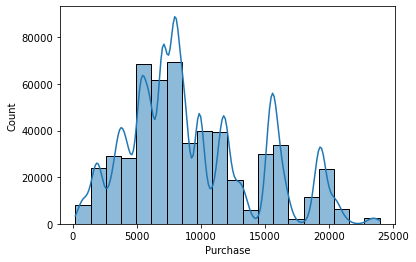

In [3]:
sns.histplot(df["Purchase"], bins=20, kde=True)

The visualization does not indicate a normal distribution.

For this particular case - qualitative (nominal) variable x quantitative (continuous) variable) - the boxplot is the chosen tool to check for a correlation. 

#### 3. Correlation Analysis.

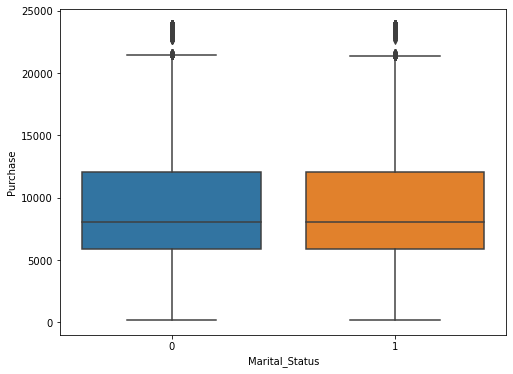

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="Marital_Status", y="Purchase", data=df)

#### 4. Conclusion.

The Boxplot for the different marital status are very similar and it **does not indicate any correlation**.

### Marital status influence in the purchase category

#### 1. Analyzing variables "Marital Status" and "Product_Category_X".

- Marital Status: qualitative (nominal) variable. "0" represents single and "1" represents married.
- Product_Category_X: qualitative (nominal) variables. Despite being represented as integers, they represent a category of which a product may belong to.

#### 2. Choosing analysis method.

For these two qualitative norminal variables, Frequency Table and Barplot are the chosen tools.

#### 3. Correlation Analysis.

In [32]:
# Saving a Dataframe with only desired data to a variable
df_categories = df[
    ["Marital_Status", "Product_Category_1", "Product_Category_2", "Product_Category_3"]
]

df_melted_categories = df_categories.melt(id_vars="Marital_Status")
df_melted_categories.rename(
    {"value": "Product_Category", "variable": "Variable"}, axis=1, inplace=True
)

df_crosstab = pd.crosstab(
    index=df_melted_categories["Marital_Status"],
    columns=df_melted_categories["Product_Category"],
    normalize="index",
)  # Normalizing Crosstab per Marital Status

# Showing percentage
(df_crosstab * 100).round(2)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Marital_Status,,,,,,,,,,,,,,,,,,
0,13.08,6.82,2.25,3.74,17.95,3.88,0.37,17.06,1.68,0.83,3.78,1.66,1.92,6.8,6.62,7.94,2.71,0.91
1,12.64,6.55,2.06,3.40,17.57,3.79,0.44,18.12,1.54,1.01,3.58,1.79,2.06,7.0,6.65,7.78,2.96,1.05


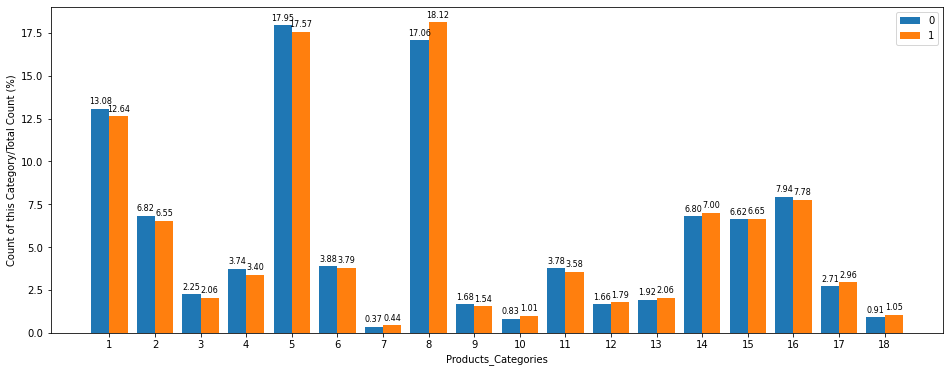

In [8]:
X = list(df_crosstab.columns)
Y0 = list(df_crosstab.iloc[0].values)
Y1 = list(df_crosstab.iloc[1].values)
X_axis = np.arange(len(X))

fig, ax = plt.subplots(figsize=(16, 6))

rects1 = ax.bar(X_axis - 0.2, Y0, 0.4, label="0")
rects2 = ax.bar(X_axis + 0.2, Y1, 0.4, label="1")

for chart in (rects1, rects2):
    for rect in chart:
        height = rect.get_height()
        ax.annotate(
            f"{height:.2f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            fontsize=8,
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

ax.set_xticks(X_axis)
ax.set_xticklabels(X)
ax.set_xlabel("Products_Categories")
ax.set_ylabel("Count of this Category/Total Count (%)")
ax.legend()

#### 4. Conclusion.

The visualizations indicates the two Marital Status have pretty similar behavior when it comes to purchases and categories. Highlights:

- Categories 1, 5 e 8 represent 48% of the products to both marital status.
- The highest absolute difference is in category 8: 1,06 b.p.
- The highest absolute relative is in category 10: 22%.

### If one wants to sell more products of category 14, should one invest more in publicity for marital status 0 or 1?

In [35]:
# Filtering sales of category 14
filtro_categoria14 = (
    (df["Product_Category_1"] == 14)
    | (df["Product_Category_2"] == 14)
    | (df["Product_Category_3"] == 14)
)

print("Purchases of category 14:")
print(
    pd.crosstab(
        index=df_melted_categories["Marital_Status"],
        columns=df_melted_categories["Product_Category"],
    )[14]
)

print("\Total purchase value of category 14:")
print(df[filtro_categoria14].groupby(by="Marital_Status")["Purchase"].sum())

Purchases of category 14:
Marital_Status
0    43271
1    30508
Name: 14, dtype: int64

Average purchase value of category 14:
Marital_Status
0    343916804
1    242855346
Name: Purchase, dtype: int64


In [37]:
print("Overall number of purchases:")
print(df.groupby(by="Marital_Status")["Purchase"].count())

print("\nOverall total purchase value:")
print(df.groupby(by="Marital_Status")["Purchase"].sum())

Overall number of purchases:
Marital_Status
0    317817
1    219760
Name: Purchase, dtype: int64

Overall total purchase value:
Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64


#### Summarizing

**Marital Status "0":**
- Made 317.817 purchases:
    - From these purchases, 43.271 had a product from category 14. Representing 13,6% of the total purchases.
- Spent R\$ 2.966.289.500,00:
    - From This value, R\$ 343.916.804,00 was spent in products of category 14. That represent 11,59% of the spent total.
    
**Marital Status "1":**
- Made 219.760 purchases:
    - From these purchases, 30.508 had a product from category 14. Representing 13,9% of the total purchases.
- Spent R\$ 2.051.378.878,00:
    - From This value, R\$ 242.855.346,00 was spent in products of category 14. That represent 11,83% of the spent total.
    
#### Regards

**Overall, none of these groups presented itself as a clear target audience for products from category 14.**

If one would like to take advantage of the subtle behavior differences, we can consider that marital status "0" made more purchases and spent more money. The publicity could be directed to:
- Sales closing for marital status "0", since this group is more willing to buy this category (and overral products).
- Product awareness for marital status "1", which is less present in this category.

Fot a data-driven final decision, more questions must be analyzed and answered:

- What is our market-share for each group?
- What is the click and awareness cost for each group?
- What is the conversion percentage in the sales funnel for each group?
- What is the customer retetion rate and behavior for each group?

## 🔍 Influence in the value of the purchase

### Question 1: Which variables are correlated to the value of the purchase?

#### 1. Analyzing all variables.

Disregarded variables:
- Marital_Status: analyzed in the analysis above.
- Gender: qualitative (nominal) variable.
- Age: qualitative (ordinal) variable.
- Occupation: qualitative (nominal) variable.
- Stay_In_Current_City_Years: qualitative (ordinal) variable.
- Product Category (1): qualitative (nominal) variable.

- Product_ID: an unique ID for each product.

#### 2. Choosing analysis method.

For the qualitative variables, the same tool from the previous analysis will be used: the Boxplot.

Product_ID variable will be grouped and analyzed by its behaviour.

#### 3. Correlation Analysis.

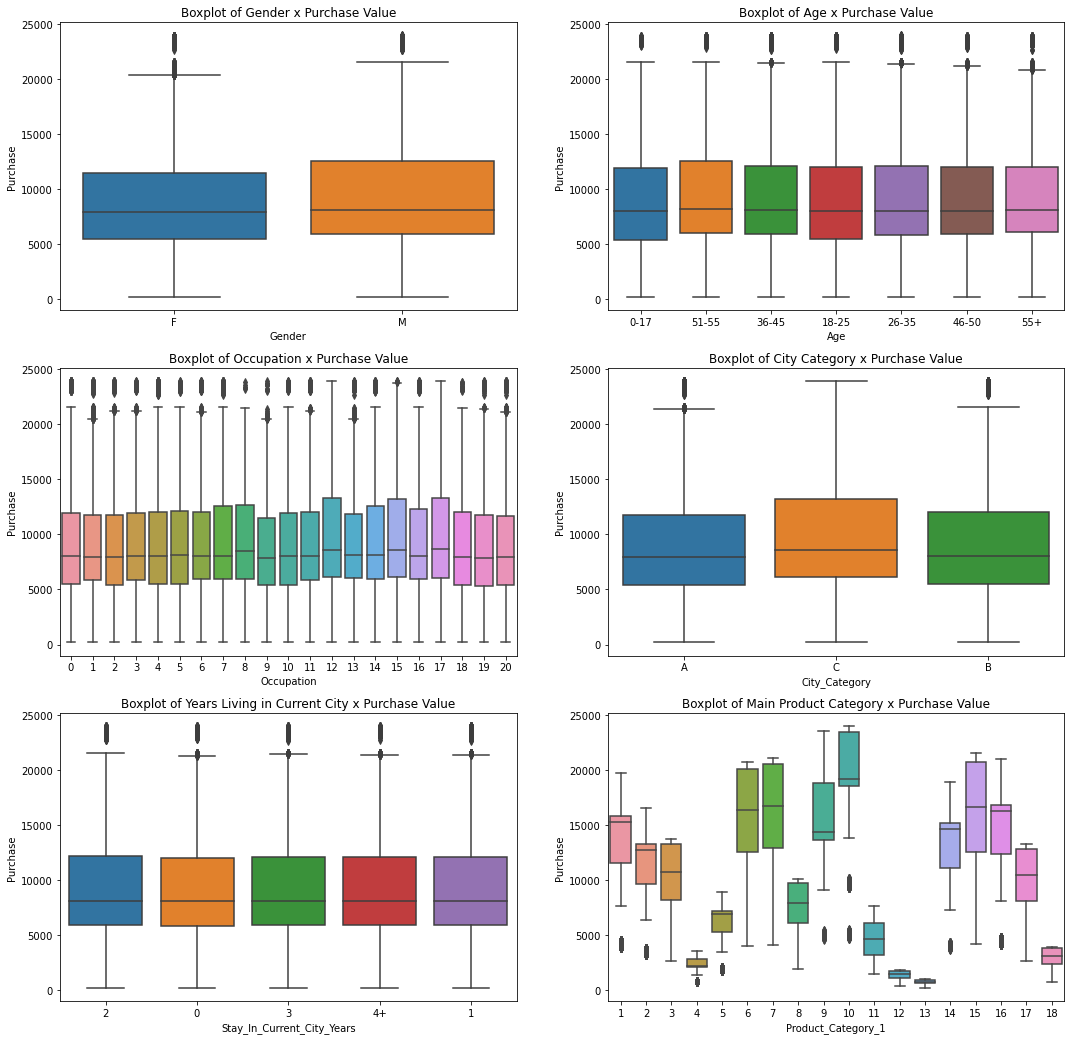

In [40]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    nrows=3, ncols=2, figsize=(18, 18)
)

# Gender
sns.boxplot(ax=ax1, x="Gender", y="Purchase", data=df)
ax1.set_title("Boxplot of Gender x Purchase Value")

# Age
sns.boxplot(ax=ax2, x="Age", y="Purchase", data=df)
ax2.set_title("Boxplot of Age x Purchase Value")

# Occupation
sns.boxplot(ax=ax3, x="Occupation", y="Purchase", data=df)
ax3.set_title("Boxplot of Occupation x Purchase Value")

# City_Category
sns.boxplot(ax=ax4, x="City_Category", y="Purchase", data=df)
ax4.set_title("Boxplot of City Category x Purchase Value")

# Stay_In_Current_City_Years
sns.boxplot(ax=ax5, x="Stay_In_Current_City_Years", y="Purchase", data=df)
ax5.set_title("Boxplot of Years Living in Current City x Purchase Value")

# Product_Category_1
sns.boxplot(ax=ax6, x="Product_Category_1", y="Purchase", data=df)
ax6.set_title("Boxplot of Main Product Category x Purchase Value")

plt.show()

In [43]:
# Product_ID
df_product_ID = df.groupby(by=["Product_ID"])["Purchase"].describe()

# Including Range
df_product_ID["range"] = np.abs(df_product_ID["max"] - df_product_ID["min"])

df_product_ID

,count,mean,std,min,25%,50%,75%,max,range
Product_ID,,,,,,,,,
P00000142,1130.0,11143.507080,2307.942795,2725.0,10591.25,10925.5,13380.00,13716.0,10991.0
P00000242,371.0,10552.293801,3179.231273,3214.0,9585.00,10023.0,13025.00,16503.0,13289.0
P00000342,238.0,5299.928571,1834.617830,1727.0,3692.25,5286.5,6928.00,8896.0,7169.0
P00000442,92.0,4795.358696,1664.088125,1764.0,3599.75,5194.0,5394.75,8891.0,7127.0
P00000542,146.0,5419.308219,1742.058891,1730.0,3748.50,5375.0,6966.25,8903.0,7173.0
...,...,...,...,...,...,...,...,...,...
P0099442,196.0,14353.642857,3716.564096,4093.0,12189.00,16007.5,16411.75,20684.0,16591.0
P0099642,13.0,6439.230769,2108.412442,3903.0,4222.00,5972.0,7862.00,10056.0,6153.0
P0099742,123.0,7862.373984,2936.961342,2670.0,5589.00,8185.0,10632.50,13661.0,10991.0


#### 4. Conlcusion.

**Product ID**

- Some products were sold with a long range of difference in values. Different sales strategies might be directed to users that bought values on maximum and minimum values.

**Qualitative Variables**

No correlation found:
- Stay_In_Current_City_Years.

Small indication of correlation:
- Gender: males had a slightly higher concentration of purchase value.
- Age: indicates that as the age rises, so does the purchase value. 51-55 category presented the highest concentration of purchase value.
- Occupation: "12", "15" and "17" had superior values and "9" and "10" inferior values.
- City_Category: "C" had a slightly higher concentration of purchase value.

Relevant indication of correlation:
- Product_Category: the category have a hight impact in the purchase value and each category has a behavior/range. Category "10" had the highest value and "13" had the smallets.